In [1]:
import sys
import numpy as np
sys.path.append('../../../nn')
from mynn import *
from mydata import *
from datetime import datetime

import matplotlib as mpl 
from matplotlib.lines import Line2D 
# mpl.use('TkAgg')
import matplotlib.pyplot as plt

plt.rc("figure", dpi=300)           # High-quality figure ("dots-per-inch")
plt.rc("text", usetex=True)         # Crisp axis ticks
plt.rc("font", family="serif")      # Crisp axis labels
plt.rc("legend", edgecolor='none')  # No boxes around legends

plt.rc("figure",facecolor="#ffffff")
plt.rc("axes",facecolor="#ffffff",edgecolor="#000000",labelcolor="#000000")
plt.rc("savefig",facecolor="#ffffff")
plt.rc("text",color="#000000")
plt.rc("xtick",color="#000000")
plt.rc("ytick",color="#000000")

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def colnorm(u):
	return np.sqrt(np.sum(u**2,0))


print("Here")
M = 20000

N = 200
ntrain = M//2
N_theta = 100
prefix = "../../../data/"  
a0 = np.load(prefix+"adv_a0.npy")
aT = np.load(prefix+"adv_aT.npy")


acc = 0.999

xgrid = np.linspace(0,1,N)
dx    = xgrid[1] - xgrid[0]

inputs  = a0
outputs = aT

compute_input_PCA = True

if compute_input_PCA:
    train_inputs = inputs[:,:M//2] 
    test_inputs  = inputs[:, M//2:M]
    Ui,Si,Vi = np.linalg.svd(train_inputs)
    en_f= 1 - np.cumsum(Si)/np.sum(Si)
    r_f = np.argwhere(en_f<(1-acc))[0,0]

    r_f = 200
    Uf = Ui[:,:r_f]
    f_hat = np.matmul(Uf.T,train_inputs)
    x_train = torch.from_numpy(f_hat.T.astype(np.float32))
else:
    
    print("must compute input PCA")
    
    
train_outputs = outputs[:,:M//2] 
test_outputs  = outputs[:,M//2:M]
Uo,So,Vo = np.linalg.svd(train_outputs)
en_g = 1 - np.cumsum(So)/np.sum(So)
r_g = np.argwhere(en_g<(1-acc))[0,0]
Ug = Uo[:,:r_g]


Here


## Training error 

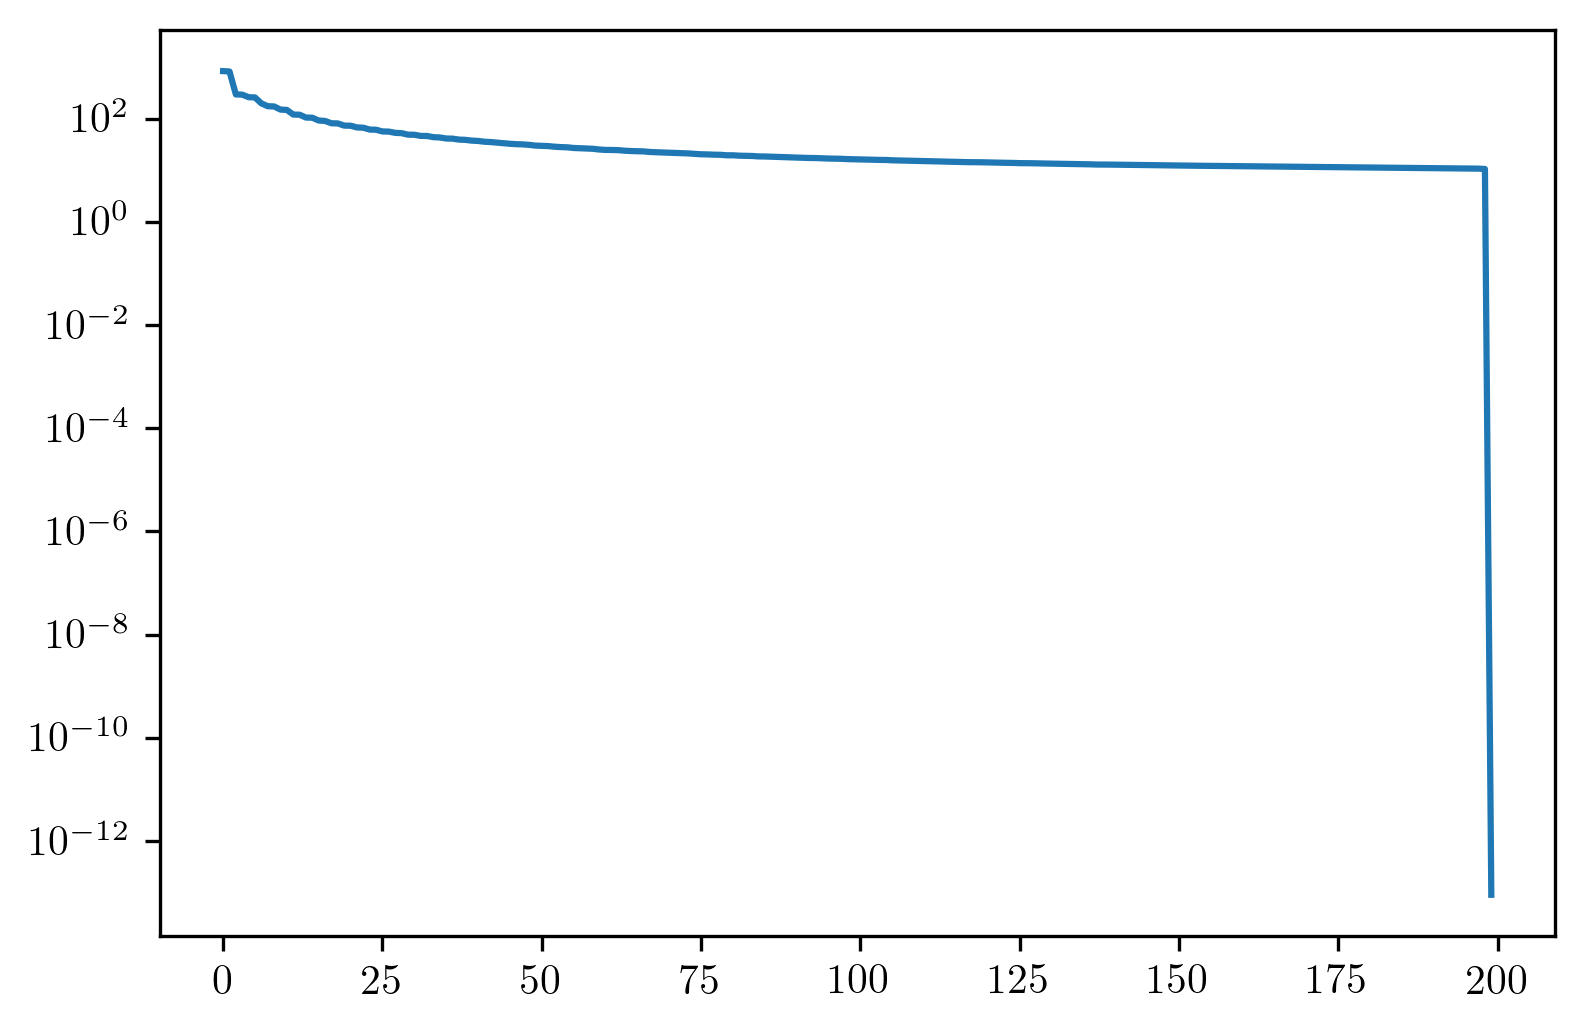

In [8]:
plt.semilogy(So, "-", fillstyle="none")


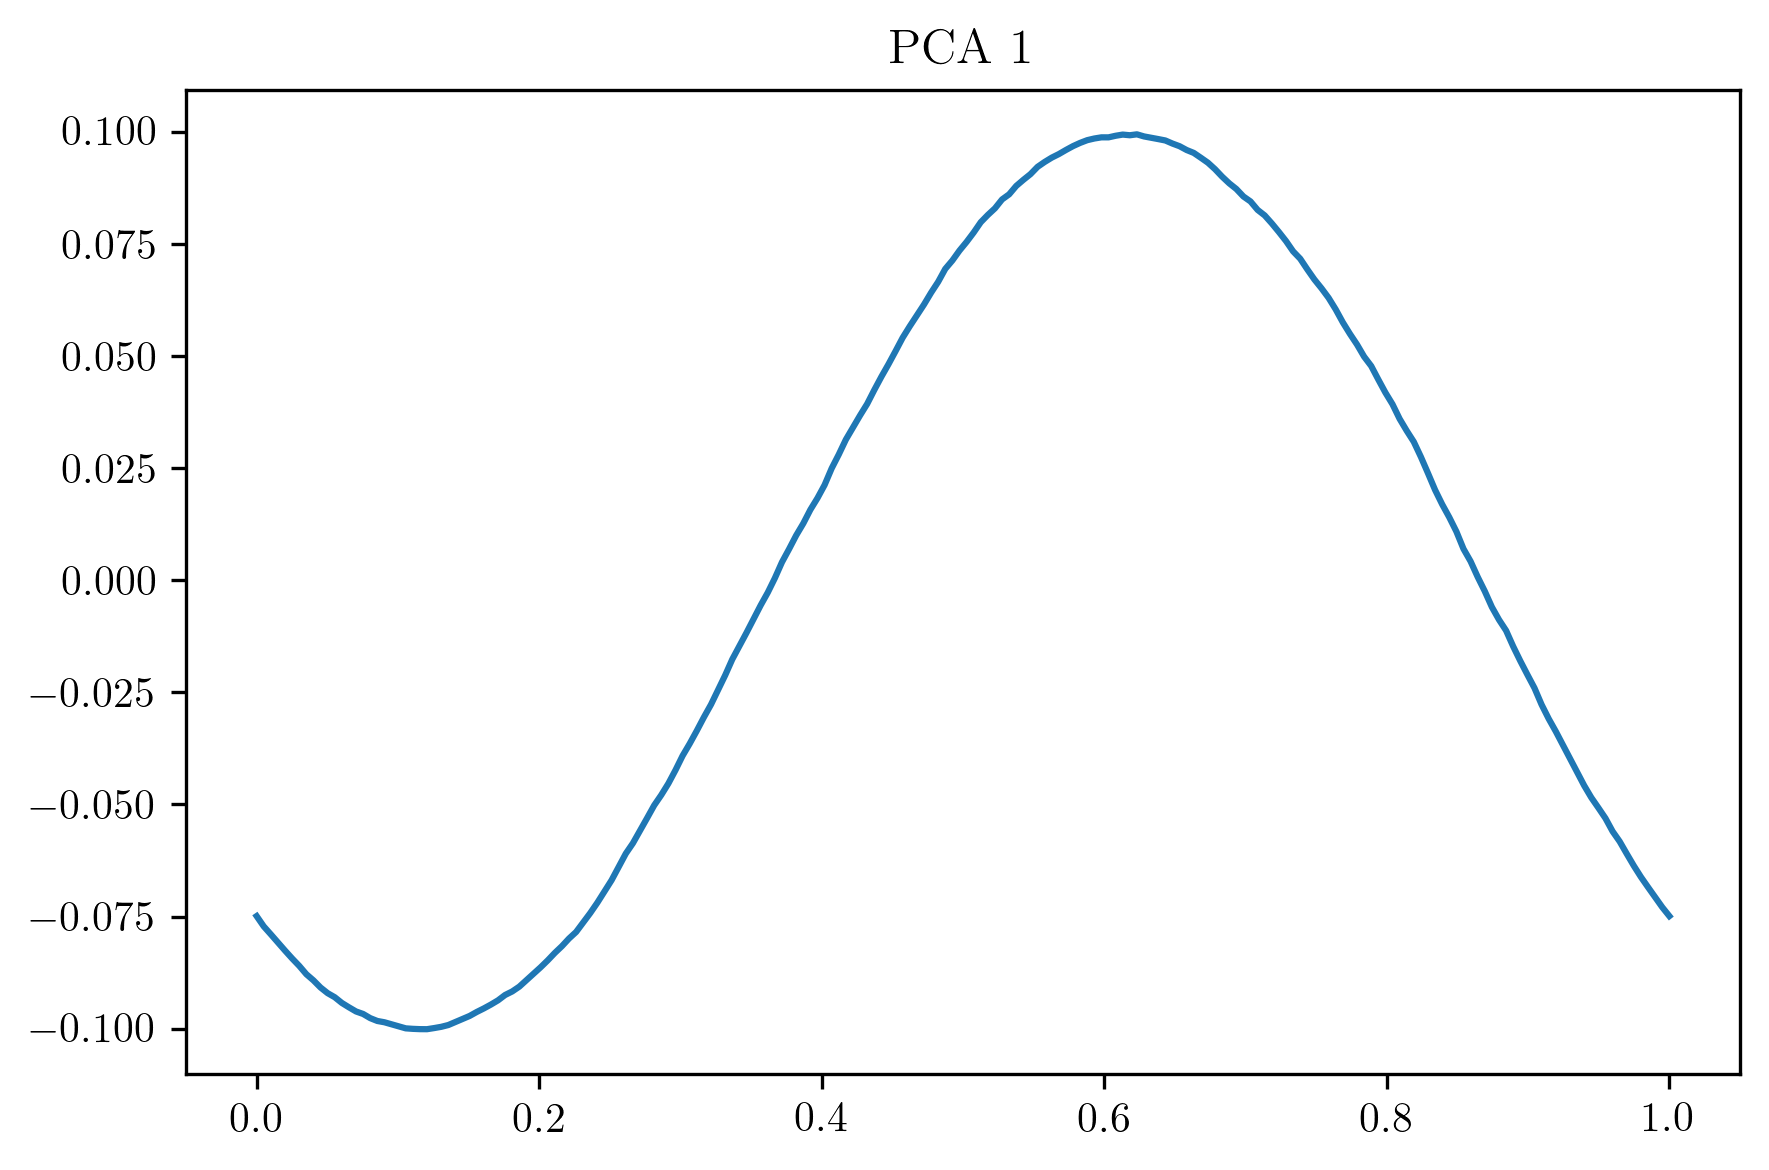

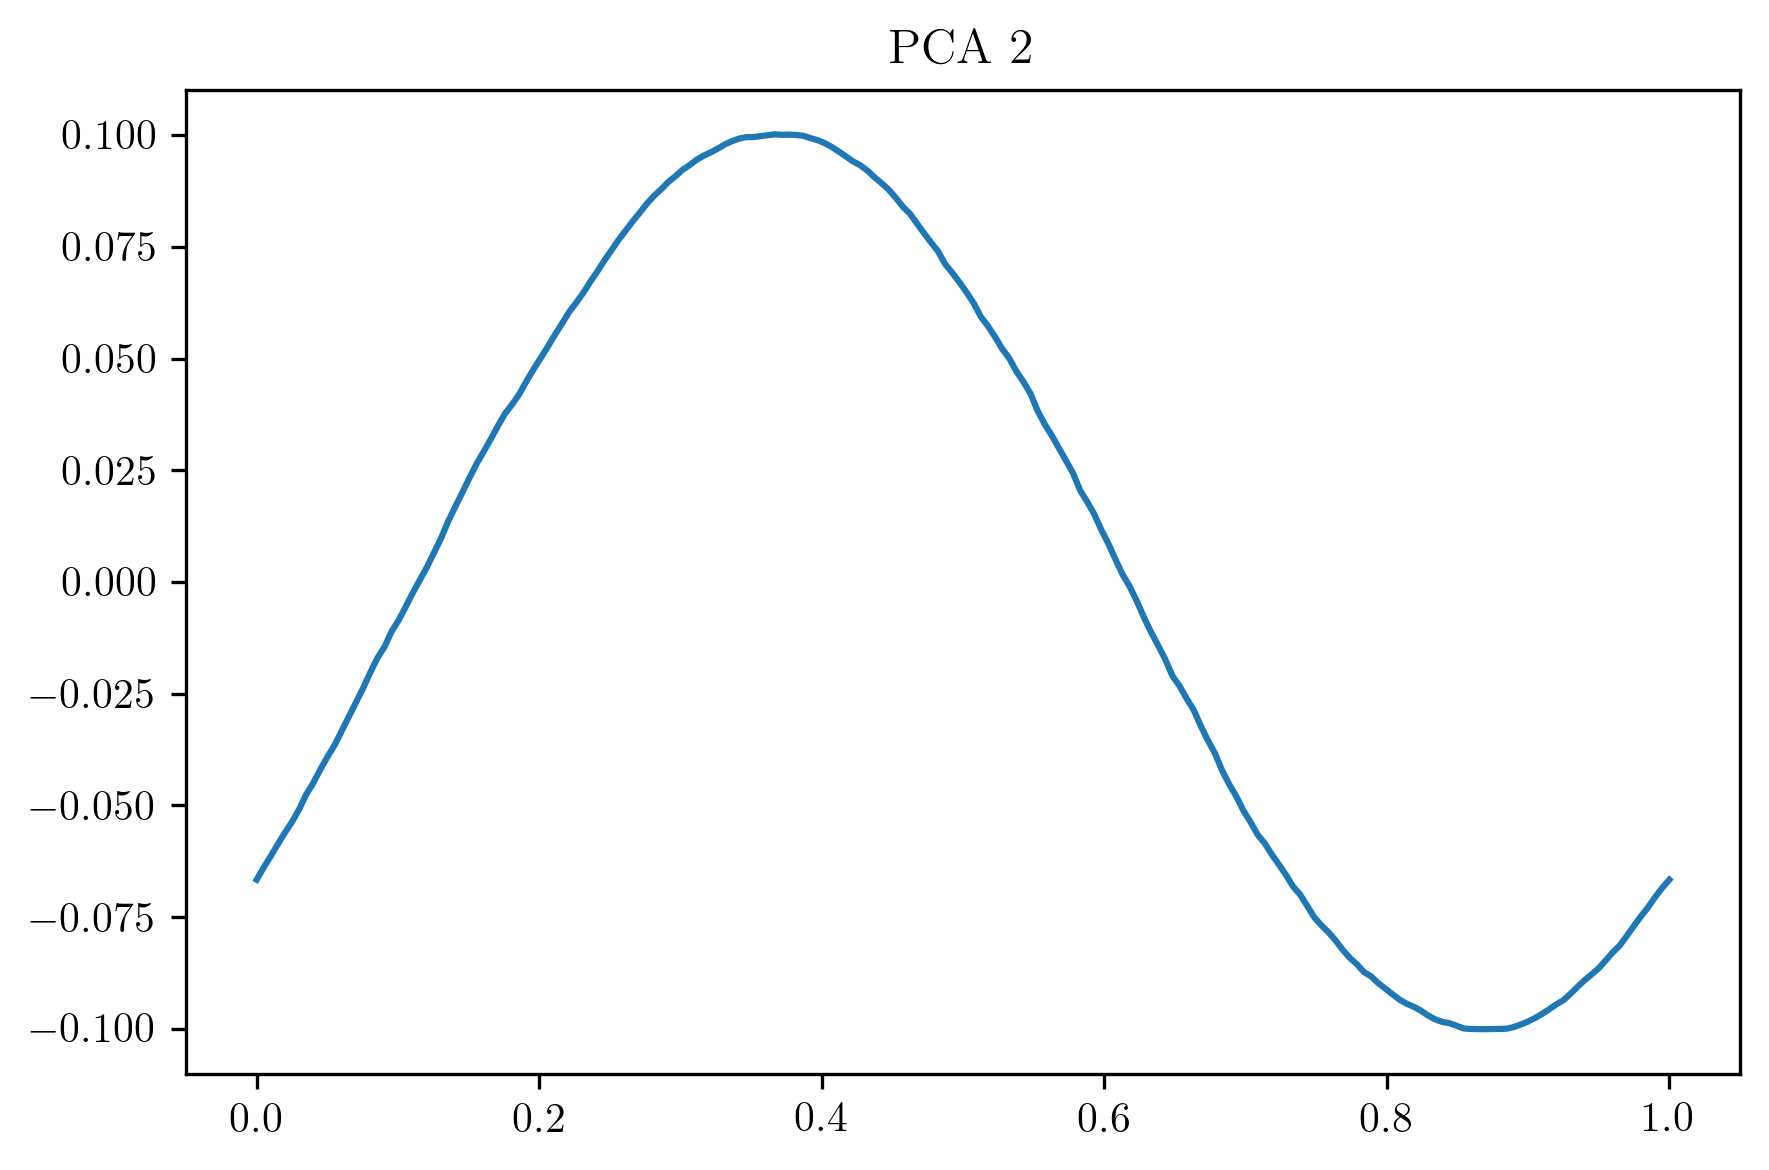

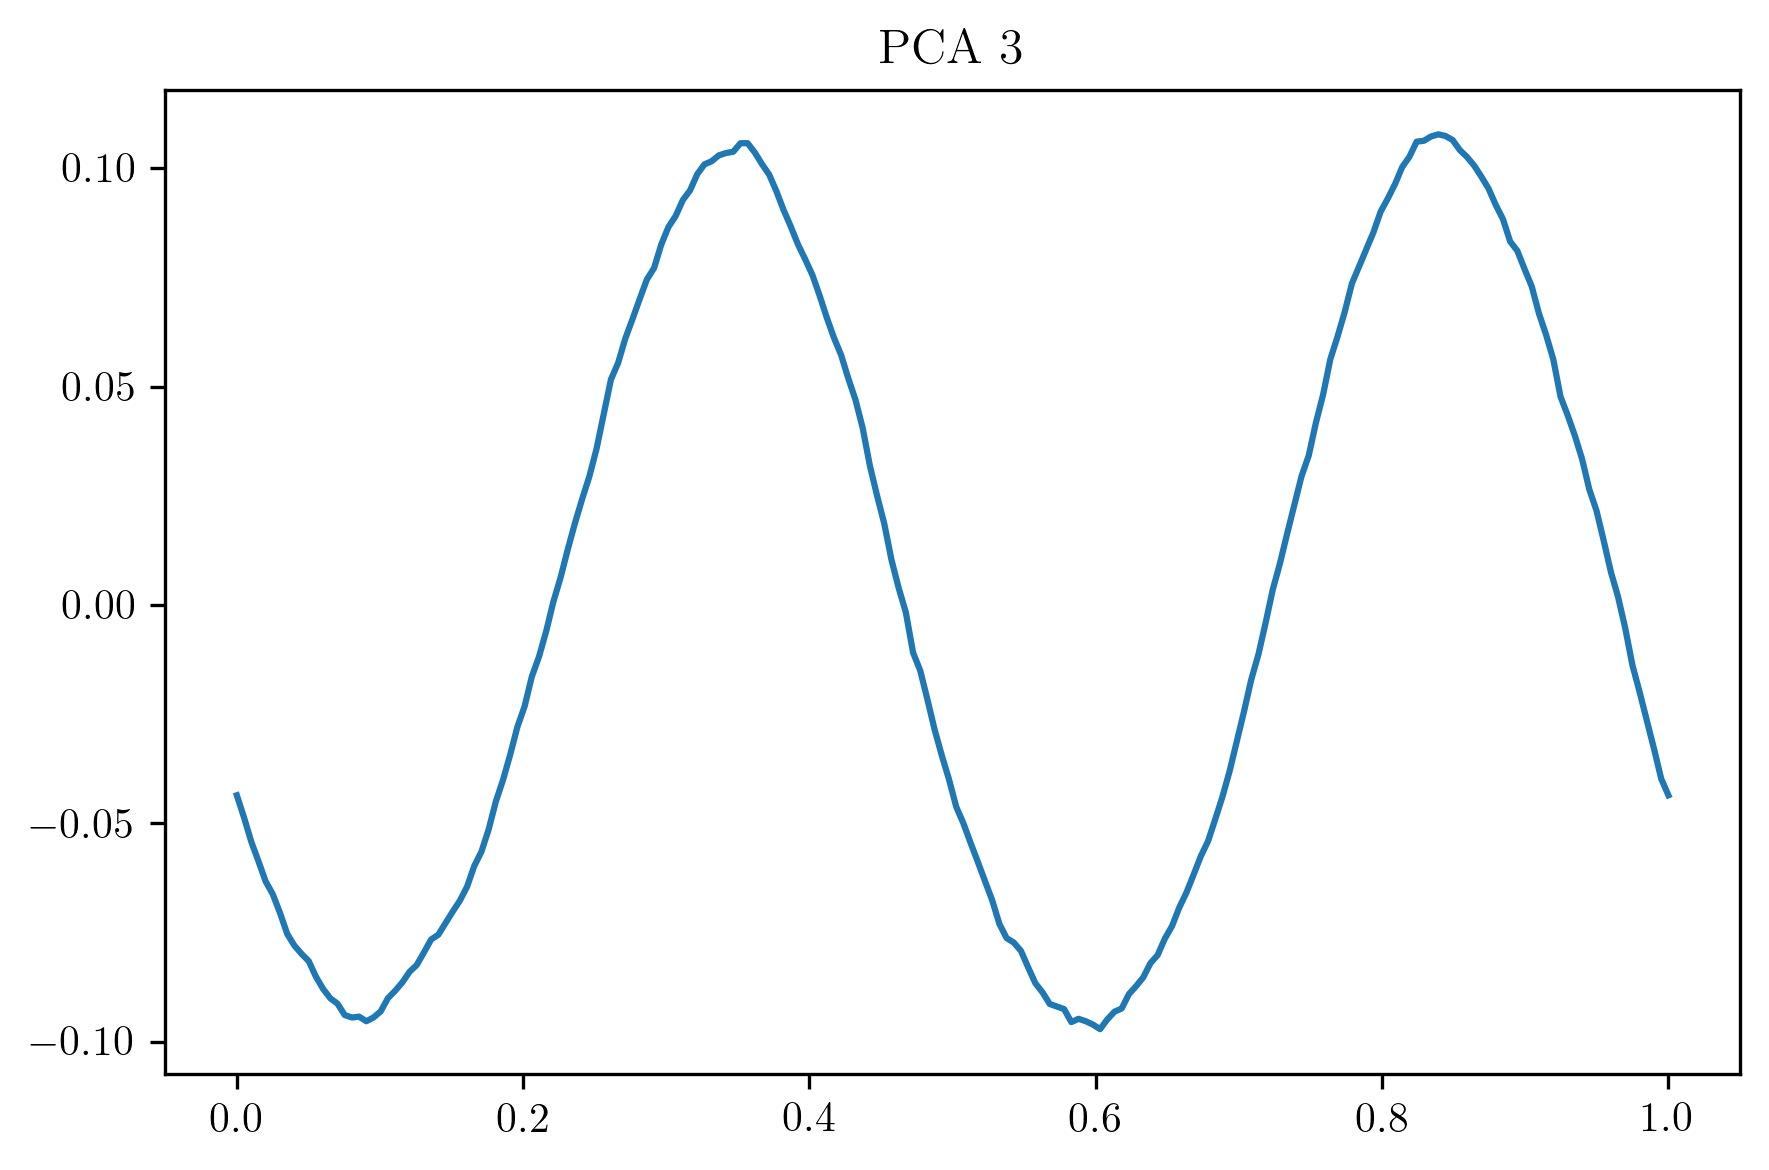

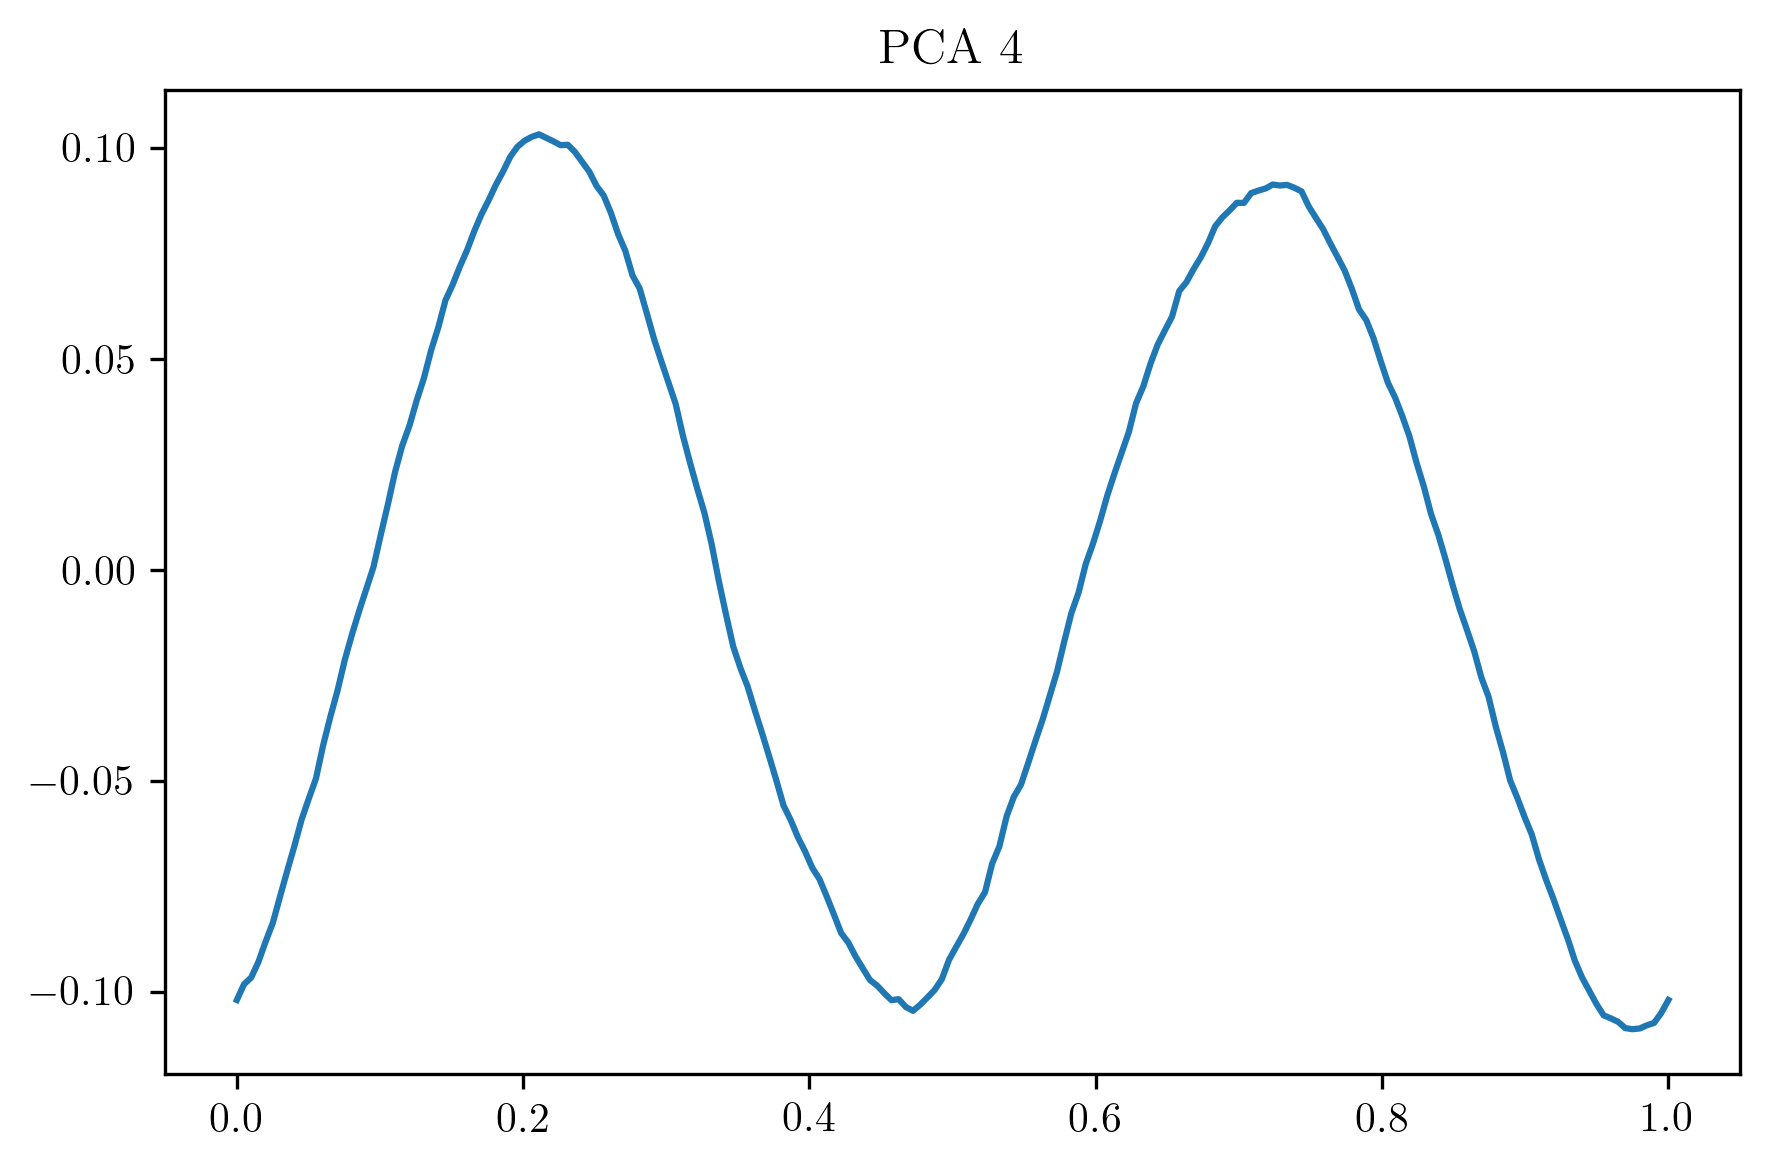

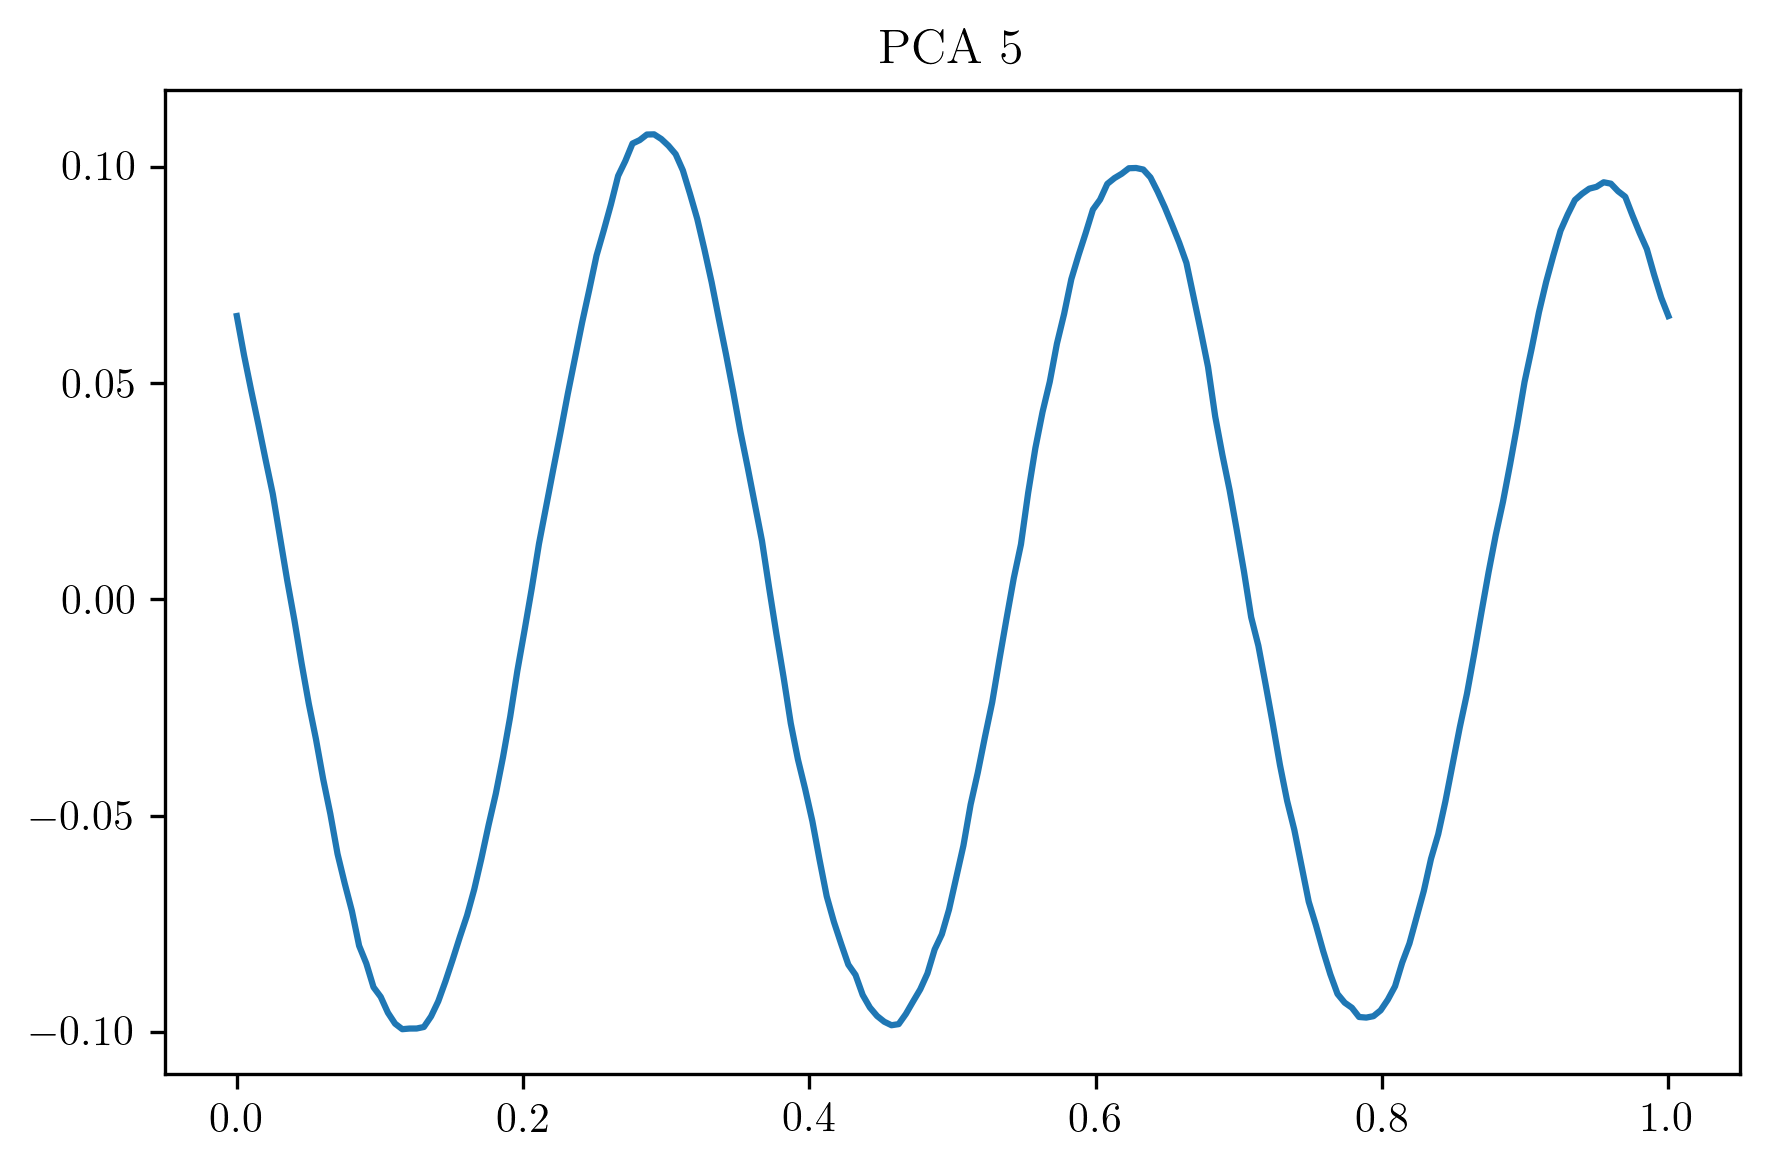

In [11]:
prefix = "./"
problem = "adv"
fig = plt.figure()
plt.plot(xgrid, Ug[:, 0])
plt.title("PCA 1")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-0.png")

fig = plt.figure()
plt.plot(xgrid, Ug[:, 1])
plt.title("PCA 2")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-1.png")


fig = plt.figure()
plt.plot(xgrid, Ug[:, 2])
plt.title("PCA 3")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-2.png")


fig = plt.figure()
plt.plot(xgrid, Ug[:, 3])
plt.title("PCA 4")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-3.png")

fig = plt.figure()
plt.plot(xgrid, Ug[:, 4])
plt.title("PCA 5")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-4.png")



In [6]:
np.shape(train_outputs
        )

(10201, 10000)